# Flights analysis
## by Michael Wassef

## Investigation Overview

In this presentation, the findings of my analysis on the flights that took place in December 2008.

## Dataset Overview

The dataset contains data of 50000 flights that took place in December 2008. Each flight record contains the information for the flight delay and its destination.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("airline_dec_2008_50k.csv", dtype='unicode')
df.DayofMonth = pd.to_numeric(df.DayofMonth)
df.DayOfWeek = pd.to_numeric(df.DayOfWeek)
days = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']
df.DayNameOfWeek = df.DayOfWeek.apply(lambda x: days[x-1])

## Flights distribution in December 2008

It's visible that there are more flights in the first half of the month and there are less flights in the Christmas season.

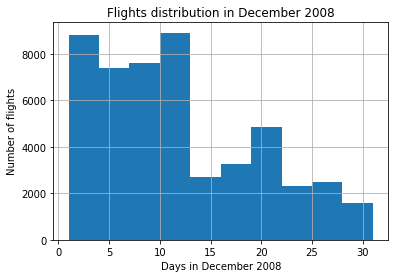

In [3]:
ax = df.DayofMonth.hist();
ax.set_ylabel("Number of flights")
ax.set_xlabel("Days in December 2008")
ax.set_title("Flights distribution in December 2008");

## Flights distribution in a week

It's visible that there are less flights on the weekends (Sat and Sun). Friday is the most day that has flights.

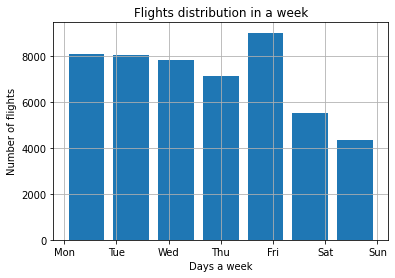

In [4]:
ax = df.DayNameOfWeek.hist(rwidth=0.8, bins=7);
ax.set_ylabel("Number of flights")
ax.set_xlabel("Days a week")
ax.set_title("Flights distribution in a week");

## Delayed vs non delayed flights

Almost one fourth of the flights are delayed

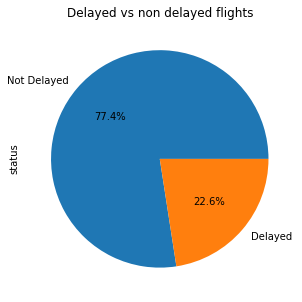

In [5]:
df['Delayed'] = df.ArrDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df.Delayed.unique()

flights = pd.DataFrame({
    'status': 
    [
        df.shape[0] - df['Delayed'].sum(),
        df['Delayed'].sum()
    ]
},
index= ['Not Delayed', 'Delayed'])
ax = flights.plot(kind="pie",y='status', figsize=(5,5), autopct='%1.1f%%', legend=False)
ax.set_title("Delayed vs non delayed flights");

## Top 10 airports that are home to more delays

Top city that have delays is atlanta airport, followed by Chicago O'Hare International Airport, and Denver International Airport

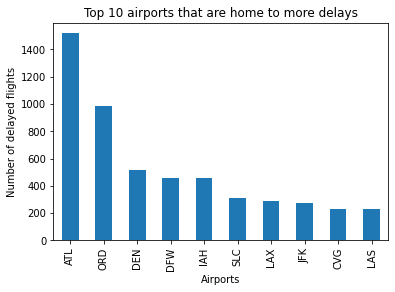

In [6]:
df2 = df.groupby('Dest')['Delayed'].sum().reset_index()

top10 = df2.sort_values(by=['Delayed'], ascending=False).head(10)
ax = top10.plot(kind="bar", x='Dest', y ='Delayed', legend=False);
ax.set_ylabel("Number of delayed flights")
ax.set_xlabel("Airports")
ax.set_title("Top 10 airports that are home to more delays");

## Delays per carriers

WN(Southwest Airlines) and OO(SKYWEST) are the most 2 carriers that had delays.

Text(0.5, 1.0, 'Flights delay per carrier')

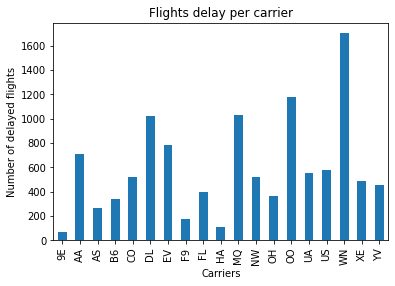

In [7]:
df3 = df.groupby('UniqueCarrier')['Delayed'].sum().reset_index()
ax = df3.plot(kind="bar", x='UniqueCarrier', y ='Delayed', legend=False);
ax.set_ylabel("Number of delayed flights")
ax.set_xlabel("Carriers")
ax.set_title("Flights delay per carrier");

## Relation between flights delay and flights distance

There is no relation between flights delay and the flight distances.

Text(0.5, 1.0, 'Flights delays w.r.t flight distances')

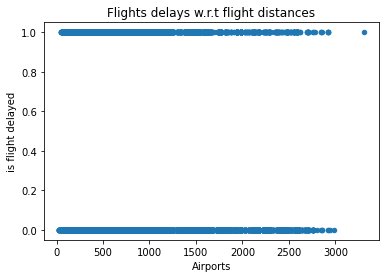

In [8]:
df.Distance = pd.to_numeric(df.Distance)
ax = df.plot.scatter(x='Distance', y='Delayed', legend=False)
ax.set_ylabel("is flight delayed")
ax.set_xlabel("Airports")
ax.set_title("Flights delays w.r.t flight distances");

## Delay reasons

NAS delay is the top reason for flights to be delayed. 55.4% of the delays were NAS delays and 26.9% of the delays were the carrier's responsibility.

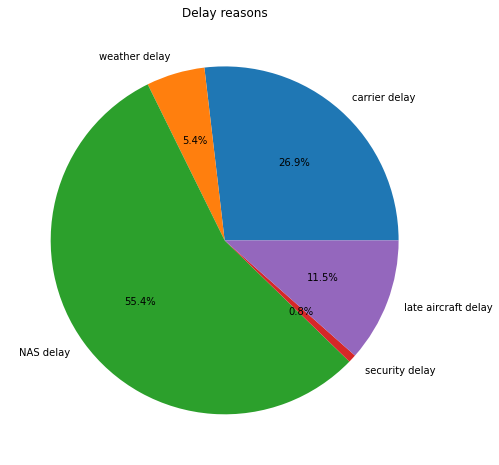

In [9]:
df['isCarrierDelayed'] = df.CarrierDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isWeatherDelayed'] = df.WeatherDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isNASDelayed'] = df.NASDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isSecurityDelayed'] = df.SecurityDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isLateAircraftDelayed'] = df.LateAircraftDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)

delays = pd.DataFrame({
    'numberOfDelays': 
    [
        df['isCarrierDelayed'].sum(),
        df['isWeatherDelayed'].sum(),
        df['isNASDelayed'].sum(),
        df['isSecurityDelayed'].sum(),
        df['isLateAircraftDelayed'].sum(),
    ]
},
index= ['carrier delay', 'weather delay', 'NAS delay', 'security delay','late aircraft delay'])

ax = delays.plot(kind="pie", y='numberOfDelays', figsize=(11,8), autopct='%1.1f%%', legend=False)
ax.set_ylabel("")
ax.set_title("Delay reasons");

## Delayed routes

LGA-ORD, DTW-ORD, BOS-JFK are the most delayed routes.

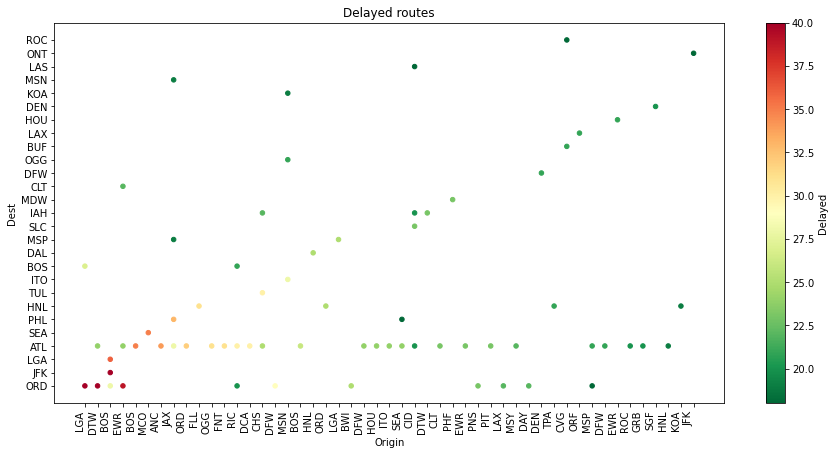

In [10]:
delayedRoutes = df.groupby(['Origin', 'Dest'])['Delayed'].sum().reset_index().sort_values(by=['Delayed'], ascending=False).head(70)
fig, ax = plt.subplots()
delayedRoutes.plot.scatter(x="Origin", y="Dest", c="Delayed", figsize=(15,7), cmap='RdYlGn_r',  ax=ax)
ax.set_xticklabels(delayedRoutes['Origin'], rotation=90, ha='right');
ax.set_title("Delayed routes");

## Cancelled routes

BOS-LGA, LGA-BOS, LGA-ORD are the routes that have the most of the cancellations.

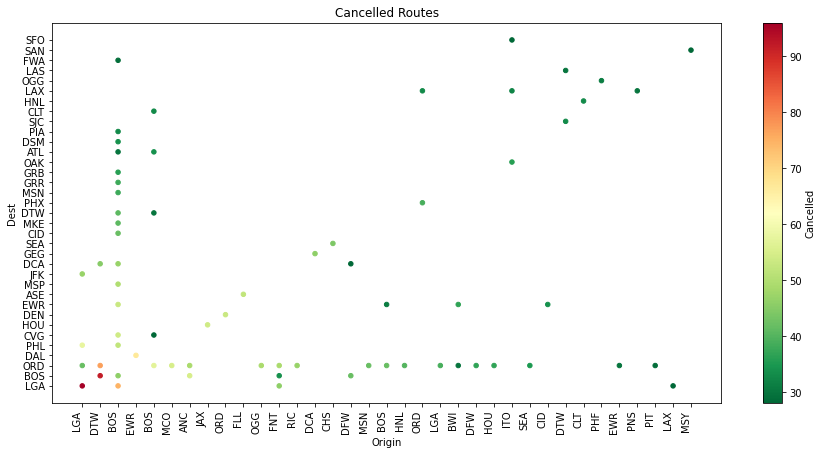

In [12]:
df.Cancelled = pd.to_numeric(df.Cancelled);
cancelledRoutes = df.groupby(['Origin', 'Dest'])['Cancelled'].sum().reset_index().sort_values(by=['Cancelled'], ascending=False).head(70)
fig, ax = plt.subplots()
cancelledRoutes.plot.scatter(x="Origin", y="Dest", c="Cancelled", figsize=(15,7), cmap='RdYlGn_r',  ax=ax)
ax.set_xticklabels(delayedRoutes['Origin'], rotation=90, ha='right');
ax.set_title("Cancelled Routes");

## Conclusion

We studied the flights in December. We found that more flights in December are before the Christmas season. Moreover, most of the flights are on Friday before the weekend. Furthermore, we studied the flights delay. Almost, 25% of the flights are delayed in December. Most of the delays are becuase of NAS (delay that is within the control of the National Airspace System) and carrier delays.